This notebook compares the predictions including confidences of the smile classifier with and without temperature scaling in order to decide, whether temperature scaling is necessary for the smile classifier or not.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

from src.classification.smile_classifier import SmileClassifier

In [2]:
# Configuration
PRETRAINED_CLASSIFIER_PATH = "../models/classifier/celeba_smile/predictor_128.pth.tar"
SCALED_CLASSIFIER_PATH = "../models/classifier/celeba_smile/predictor_128_scaled3.pth.tar"
ATTR_FILE = "../models/classifier/celeba_smile/attributes.json"
IMAGE_TENSOR__PATH = "../data/ffhq/pt_images/"
IMAGE_PATH = "../data/ffhq/images1024x1024/"

In [3]:
# Create classifier
smile_classifier = SmileClassifier(PRETRAINED_CLASSIFIER_PATH, ATTR_FILE, device="cpu")

# Scaled classifier
smile_classifier_scaled = SmileClassifier(PRETRAINED_CLASSIFIER_PATH, ATTR_FILE, SCALED_CLASSIFIER_PATH, device="cpu")

Initialized model with pretrained weights from https://download.pytorch.org/models/resnet50-19c8e357.pth
Initialized model with pretrained weights from https://download.pytorch.org/models/resnet50-19c8e357.pth


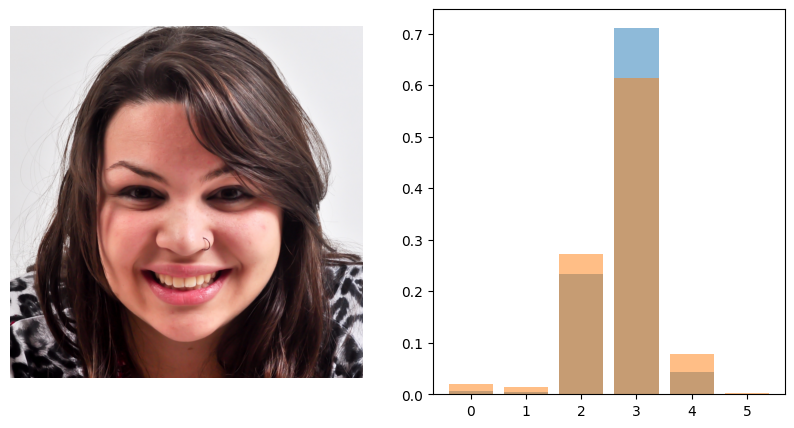

In [17]:
# Sample an image, and display the probability distribution of both classifiers
random_image = np.random.choice(os.listdir(IMAGE_TENSOR__PATH)).split(".")[0]
image_tensor_path = IMAGE_TENSOR__PATH + random_image + ".pt"
image_path = IMAGE_PATH + random_image + ".png"
image = plt.imread(image_path)
output = smile_classifier.classify([image_tensor_path], return_prob=True)
output_scaled = smile_classifier_scaled.classify([image_tensor_path], return_prob=True)

# add the probability as caption
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# show image on the left
ax[0].imshow(image)
ax[0].axis("off")

# show the probability distribution on the right
ax[1].bar([0,1,2,3,4,5], output, alpha=0.5, label="Original Classifier")
ax[1].bar([0,1,2,3,4,5], output_scaled, alpha=0.5, label="Scaled Classifier")
plt.show()

In [ ]:
# Select 9 random images
image_names = []
image_tensor_paths = []
image_paths = []
for i in range(9):
    # Randomly select an image
    random_image = np.random.choice(os.listdir(IMAGE_TENSOR__PATH)).split(".")[0]
    image_tensor_path = IMAGE_TENSOR__PATH + random_image + ".pt"
    image_path = IMAGE_PATH + random_image + ".png"

    # Append the image path to the list
    image_names.append(random_image)
    image_tensor_paths.append(image_tensor_path)
    image_paths.append(image_path)

# Classify the images using the original classifier
smile_scores = smile_classifier.classify(image_tensor_paths)

# Classify the images using the scaled classifier
smile_scores_scaled = smile_classifier_scaled.classify(image_tensor_paths)

# Plot
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        image = plt.imread(image_paths[i * 3 + j])
        axs[i, j].imshow(image)
        axs[i, j].set_title(f"{image_names[i * 3 + j]}: {smile_scores[i * 3 + j]:.2f} -> {smile_scores_scaled[i * 3 + j]:.2f}")
        axs[i, j].axis("off")